In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
df = pd.read_csv('/Users/shripadanantraobhole/Desktop/DataSets/chd-data.csv')
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df["education"] = imp.fit_transform(df[["education"]]).ravel()
most_frequent_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df["cigsPerDay"] = most_frequent_imp.fit_transform(df[["cigsPerDay"]])
mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df["BPMeds"] = mean_imp.fit_transform(df[["BPMeds"]]).ravel()
df["totChol"] = mean_imp.fit_transform(df[["totChol"]]).ravel()
df["BMI"] = mean_imp.fit_transform(df[["BMI"]]).ravel()
df["glucose"] = mean_imp.fit_transform(df[["glucose"]]).ravel()
df.dropna()
df = df[pd.notnull(df['heartRate'])]
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000
mean,0.429111,49.576787,1.980184,0.493984,8.942203,0.029622,0.005898,0.310451,0.025714,236.703698,132.345129,82.899623,25.799978,75.878981,81.961524,0.151687
std,0.495008,8.571091,1.007093,0.500023,11.905369,0.168500,0.076578,0.462733,0.158298,44.331917,22.027266,11.911182,4.070814,12.025348,22.834020,0.358759
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.075000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.025000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


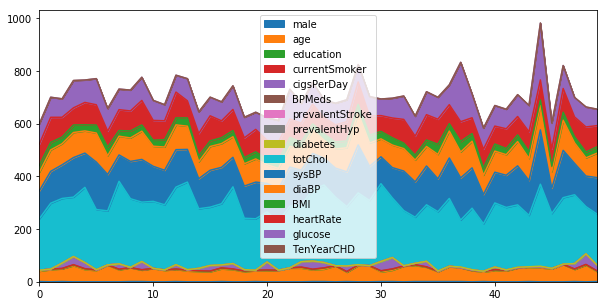

In [5]:
df.head(50).plot(kind='area',figsize=(10,5))

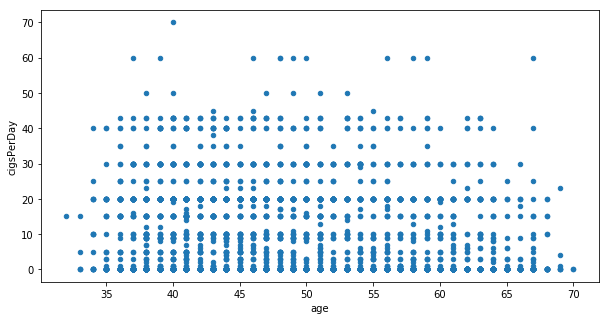

In [6]:
df.plot(x='age',y='cigsPerDay',kind='scatter',figsize =(10,5))

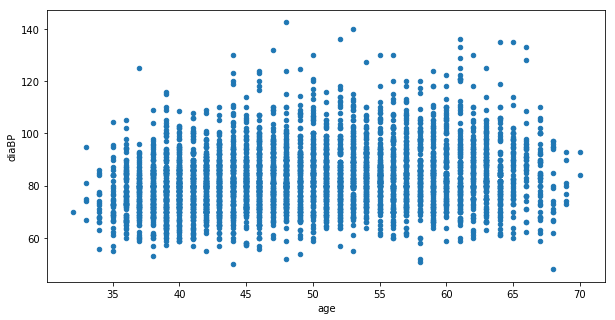

In [7]:
df.plot(x='age',y='diaBP',kind='scatter',figsize =(10,5))

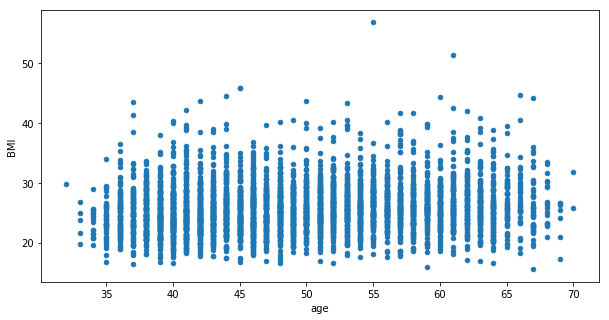

In [8]:
df.plot(x='age',y='BMI',kind='scatter',figsize =(10,5))

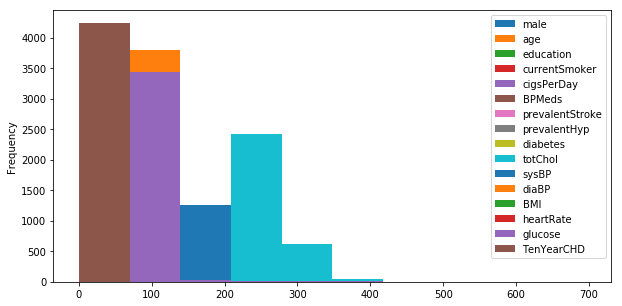

In [9]:
df.plot(kind = 'hist',figsize =(10,5))

In [10]:
# splitting the data into test and train  having a test size of 20% and 80% train size
from sklearn.model_selection import train_test_split
col = ['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']
X_train, X_test, y_train, y_test = train_test_split(df[col], df['TenYearCHD'], test_size=0.2, random_state=1234)
X_test.dropna()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2410,1,39,2.0,1,20.0,0.000000,0,0,0,190.000000,118.0,70.0,23.57,64.0,69.000000
1122,0,67,1.0,1,6.0,0.029615,0,0,0,236.699523,120.0,67.0,32.77,86.0,81.963655
2186,0,51,2.0,1,20.0,0.000000,0,1,0,293.000000,151.0,92.0,30.67,80.0,77.000000
3248,0,40,1.0,1,20.0,0.000000,0,0,0,272.000000,123.0,75.0,23.08,80.0,63.000000
1849,1,48,1.0,1,60.0,0.000000,0,0,0,252.000000,104.0,73.5,23.03,70.0,77.000000
3492,1,38,1.0,1,30.0,0.000000,0,0,0,281.000000,111.0,72.5,27.22,95.0,80.000000
2750,1,44,1.0,0,0.0,0.000000,0,0,0,229.000000,132.0,94.0,34.39,110.0,80.000000
3004,1,64,1.0,0,0.0,0.000000,0,0,0,185.000000,94.0,62.0,26.11,70.0,68.000000
1132,0,51,2.0,0,0.0,0.000000,0,1,0,206.000000,146.0,77.0,23.58,87.0,90.000000
1495,0,57,4.0,0,0.0,0.000000,0,0,0,160.000000,105.0,70.0,27.01,52.0,61.000000


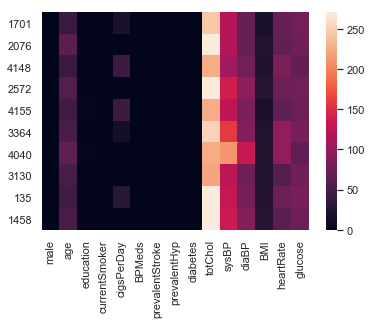

In [11]:
sns.set()
sns.heatmap(X_train.head(10),robust = True)

In [12]:
X_all = df[col]
y_all = df['TenYearCHD']

In [13]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
y_pred = svclassifier.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[716   0]
 [132   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       716
           1       0.00      0.00      0.00       132

   micro avg       0.84      0.84      0.84       848
   macro avg       0.42      0.50      0.46       848
weighted avg       0.71      0.84      0.77       848



/Users/shripadanantraobhole/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shripadanantraobhole/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shripadanantraobhole/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
